In [4]:
import numpy as np
import astropy.units as u
from astropy.io import fits

from gmagaox.math_module import xp, _scipy, ensure_np_array
import gmagaox.gmagaox as gmagaox
from gmagaox import optics
from gmagaox import utils
from gmagaox.imshows import *

from importlib import reload

import poppy

import logging
import sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False
# poppy_log.disabled = True

zemax_pupil_diams = {
    'fsm-pp':16.1887*u.mm,
    'ADC-pp':50.3325*u.mm, 
    'woofer-pp':87.6977*u.mm, 
    'tweeter-pp':73.7536*u.mm, 
    'focal plane SM - pp':12.1121*u.mm, 
    'Apodizer-pp':24.2002*u.mm, 
    'Lyot-pp':25.1939*u.mm, 
}

In [2]:
poppy.accel_math.xp

<module 'numpy' from '/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/numpy/__init__.py'>

In [3]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch
NVML library version: 535.154


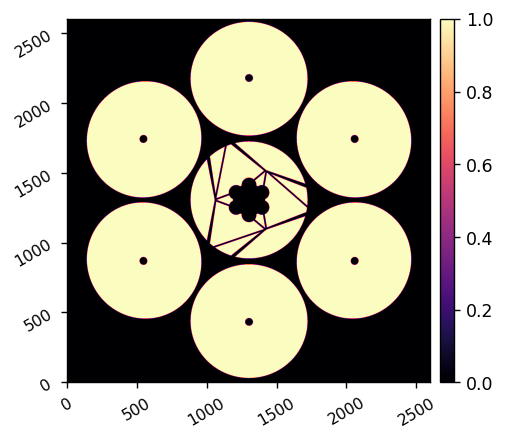

In [2]:
data = fits.getdata('gmt-pupil-1cm.fits.gz')
imshow1(data)

In [3]:
data.shape

(2600, 2600)

In [5]:
utils.save_fits('gmagaox/data/gmt_pupil_2540.fits', data, header={'PIXELSCL':0.01})

Saved data to:  gmagaox/data/gmt_pupil_2540.fits


In [3]:
np.arange(1234, 1234+47)

array([1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244,
       1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255,
       1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266,
       1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277,
       1278, 1279, 1280])

In [2]:
display(optics.distances['ifp8.157_Roap1'])
display(optics.distances['Roap1_fm1'] + optics.distances['fm1_fsm-pp'])
display(optics.focal_lengths['Roap1'])

<Quantity 130.38196123 mm>

<Quantity 131.10798718 mm>

<Quantity 130.38196123 mm>

In [3]:
reload(optics)
display(optics.distances['fsm-pp_fm2'] + optics.distances['fm2_Roap2'])
display(optics.distances['Roap2_fm3'] + optics.distances['fm3_ifp14'])
display(optics.focal_lengths['Roap2'])

<Quantity 230.87708641 mm>

<Quantity 223.95033089 mm>

<Quantity 223.95033 mm>

In [4]:
reload(optics)
display(optics.distances['ifp14_km1'] + optics.distances['km1_km2'] + \
        optics.distances['km2_km3'] + optics.distances['km3_fm4'] + \
        optics.distances['fm4_AOoap1'])
display(optics.distances['AOoap1_fm5'] + optics.distances['fm5_ADC-pp'])
display(optics.focal_lengths['AOoap1'])

<Quantity 700.54127407 mm>

<Quantity 700.54126714 mm>

<Quantity 700.54127 mm>

In [82]:
700.54127-663.3798

37.16147000000001

In [5]:
reload(optics)
display(optics.distances['ADC-pp_fm6'] + optics.distances['fm6_fm7'] + \
        optics.distances['fm7_AOoap2'])
display(optics.distances['AOoap2_ifp8.157'])
display(optics.focal_lengths['AOoap2'])

<Quantity 407.46200427 mm>

<Quantity 407.46198135 mm>

<Quantity 407.4637211 mm>

In [95]:
425.4287- 407.46198

17.96672000000001

In [6]:
reload(optics)
display(optics.distances['ifp8.157_fm8'] + optics.distances['fm8_AOoap3'] )
display(optics.distances['AOoap3_woofer-pp'])
display(optics.focal_lengths['AOoap3'])

<Quantity 705.72576702 mm>

<Quantity 634.6731312 mm>

<Quantity 705.72577 mm>

In [28]:
reload(optics)
display(optics.focal_lengths['AOoap6'])
display(optics.distances['ifp15_knifeedge']+optics.distances['knifeedge_AOoap6'])
display(optics.distances['AOoap6_fpsm-pp'])

<Quantity 179.9488382 mm>

<Quantity 179.94883908 mm>

<Quantity 179.94884198 mm>

In [65]:
reload(optics)
display(optics.focal_lengths['AOoap7'])
display(optics.distances['fpsm-pp_pfm1']+optics.distances['pfm1_pfm2']+optics.distances['pfm2_AOoap7'])
display(optics.distances['AOoap7_fm11'] + optics.distances['fm11_ifp69'])

<Quantity 827.95535 mm>

<Quantity 656.44852307 mm>

<Quantity 827.95534607 mm>

In [2]:
reload(optics)
reload(gmagaox)

model = gmagaox.MODEL(npix=2540, oversample=4096/2540)
model.wavelength = 633*u.nm

model.ifp8157_1_correction = 0.01059320*u.mm
model.ifp14_correction = -0.00011966*u.mm + 0.00000613*u.mm
model.ifp8157_2_correction = 0.00173228*u.mm + 0.00000039*u.mm
model.ifp15_correction = 0.10906065*u.mm
model.ifp15_2_correction = -0.00004823*u.mm
model.ifp69_correction = -0.01889474*u.mm
model.ifp34p5_correction = -7.30994261*u.mm + 0.00005939*u.mm
model.scicam_correction = -0.00109005*u.mm

model.adc_correction = -68*u.mm
model.woofer_correction = 72*u.mm
model.fpsm_correction = -2/3*u.mm
model.apodizer_correction = -20*u.mm
model.lyot_correction = 0.0*u.mm

wfs = model.calc_wfs()

fsm_index = 7
amp = utils.pad_or_crop(wfs[fsm_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[fsm_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'fsm Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[fsm_index].pixelscale.to(u.mm/u.pix))

adc_index = 18
amp = utils.pad_or_crop(wfs[adc_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[adc_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'ADC Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[adc_index].pixelscale.to(u.mm/u.pix))

woofer_index = 25
amp = utils.pad_or_crop(wfs[woofer_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[woofer_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'Woofer Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[woofer_index].pixelscale.to(u.mm/u.pix))

tweeter_index = 31
amp = utils.pad_or_crop(wfs[tweeter_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[tweeter_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'Tweeter Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[tweeter_index].pixelscale.to(u.mm/u.pix))

fpsm_index = 37
amp = utils.pad_or_crop(wfs[fpsm_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[fpsm_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'FPSM Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[fpsm_index].pixelscale.to(u.mm/u.pix))

apodizer_index = 31+18
amp = utils.pad_or_crop(wfs[apodizer_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[apodizer_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'Apodizer Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[apodizer_index].pixelscale.to(u.mm/u.pix))

lyot_index = 31+18+5
amp = utils.pad_or_crop(wfs[lyot_index].amplitude, model.npix)
phs = utils.pad_or_crop(wfs[lyot_index].phase, model.npix)
imshow2(amp, phs*model.pupil_mask, 'Lyot Phase', vmin2=-0.01, vmax2=0.01, pxscl=wfs[lyot_index].pixelscale.to(u.mm/u.pix))

# display(wfs[lyot_index].pixelscale.to(u.mm/u.pix)*800*u.pix)


DEBUG:poppy:Initialized: m1, fl =1.80e+01 m
DEBUG:poppy:Initialized: m2, fl =2.08e+00 m
DEBUG:poppy:Initialized: Roap1, fl =1.30e-01 m
DEBUG:poppy:Initialized: Roap2, fl =2.24e-01 m
DEBUG:poppy:Initialized: AOoap1, fl =7.01e-01 m
DEBUG:poppy:Initialized: AOoap2, fl =4.07e-01 m
DEBUG:poppy:Initialized: AOoap3, fl =7.06e-01 m
DEBUG:poppy:Initialized: AOoap4, fl =1.30e+00 m
DEBUG:poppy:Initialized: AOoap5, fl =1.10e+00 m
DEBUG:poppy:Initialized: AOoap6, fl =1.80e-01 m
DEBUG:poppy:Initialized: AOoap7, fl =8.28e-01 m
DEBUG:poppy:Initialized: AOoap8, fl =1.66e+00 m
DEBUG:poppy:Initialized: AOoap91, fl =8.21e-01 m
DEBUG:poppy:Initialized: AOoap92, fl =8.64e-01 m
DEBUG:poppy:Initialized: AOoap93, fl =8.64e-01 m
DEBUG:poppy:Trans: gmagaox/data/gmt_pupil_2540.fits
DEBUG:poppy:OPD: None
INFO:poppy:GMT Pupil: Loaded amplitude transmission from gmagaox/data/gmt_pupil_2540.fits
Propagating wavelength 633.000 nm.
DEBUG:poppy:Padded WF array for oversampling by 1.613, to (4096, 4096).
INFO:poppy:Initi

In [ ]:
display()

Correction distance: 0.00000000 mm


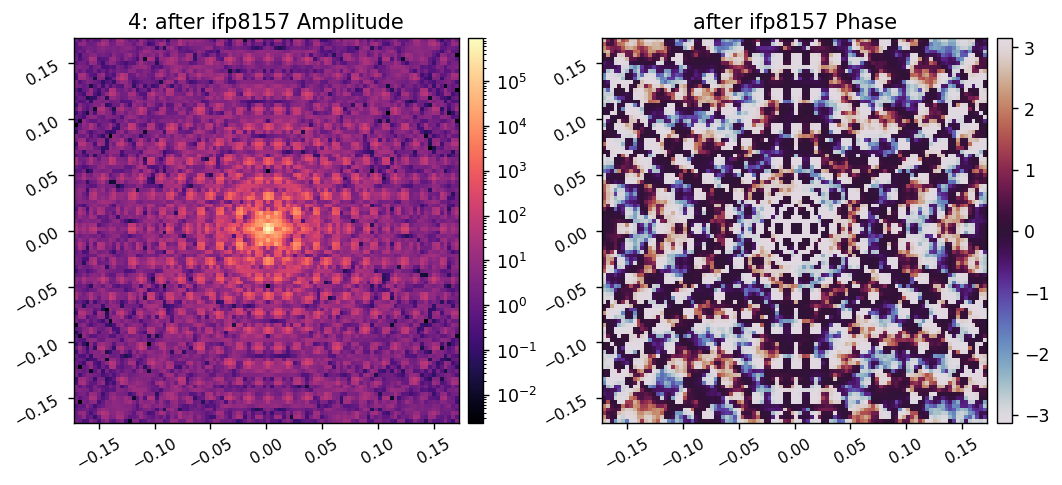

-1.4548326024235583
Pupil Diameter: 15.953181514491458 mm


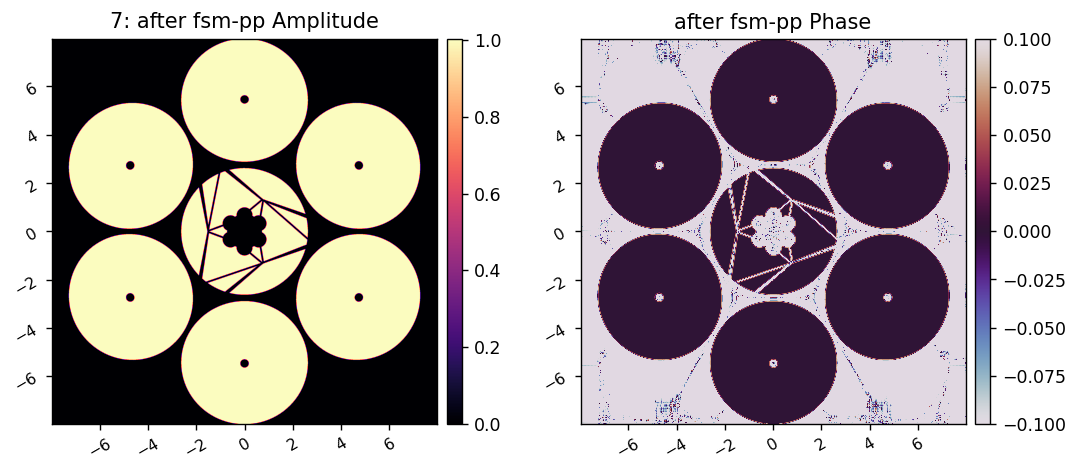

Correction distance: 0.00000000 mm


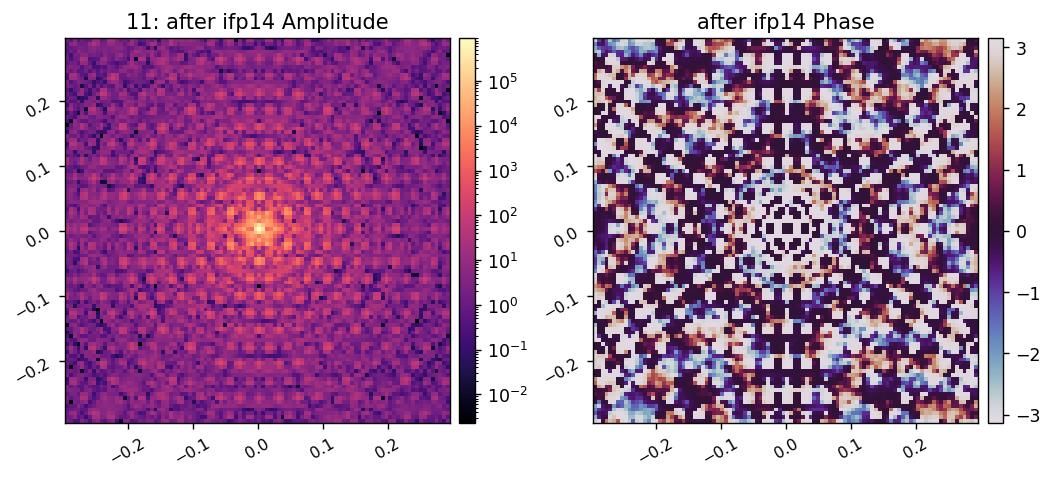

-0.8526652824155757
Pupil Diameter: 49.90333224672818 mm


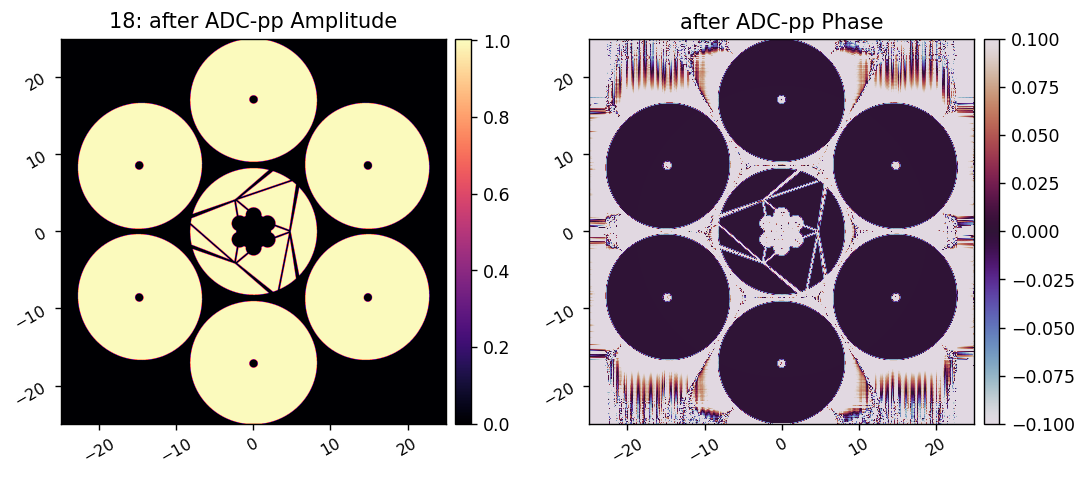

Correction distance: 0.00000000 mm


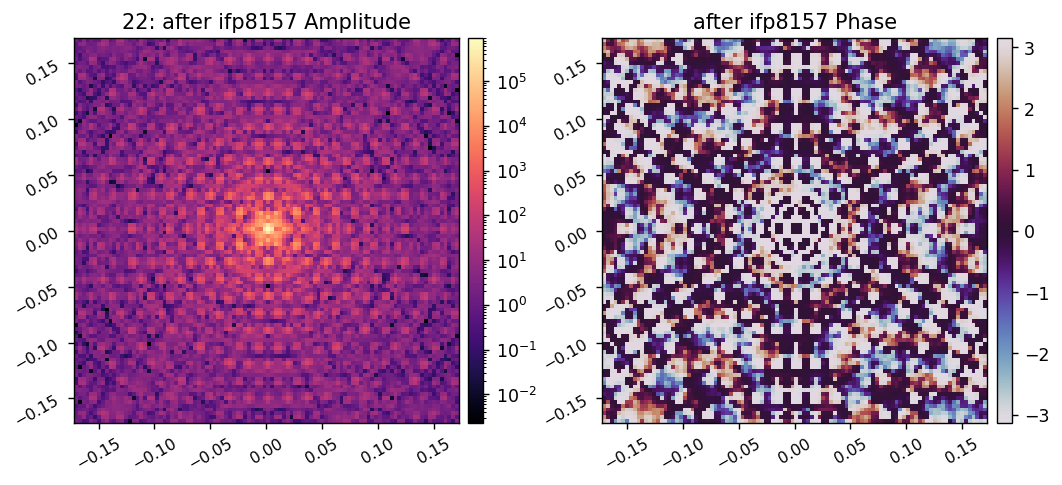

-1.4427952539441842
Pupil Diameter: 86.43240174658179 mm


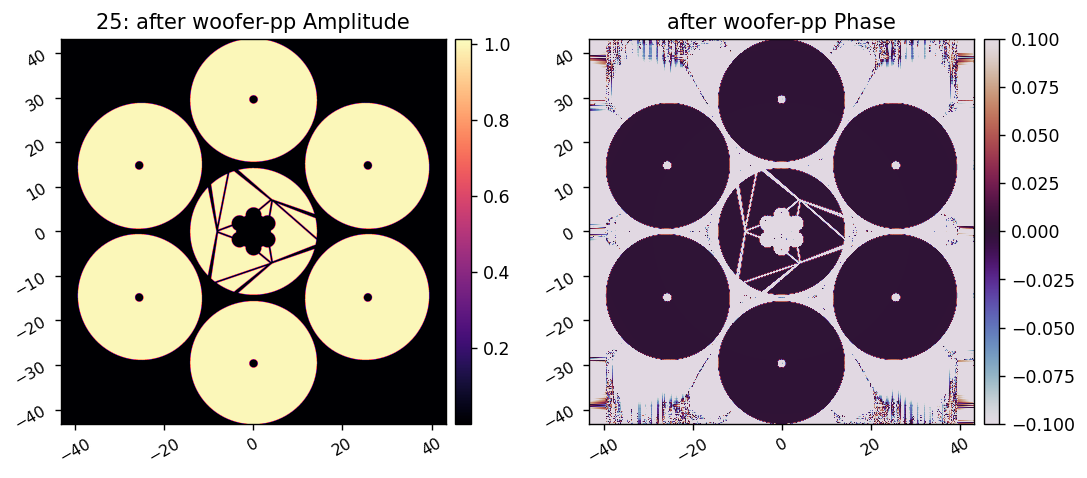

Correction distance: 0.00000139 mm


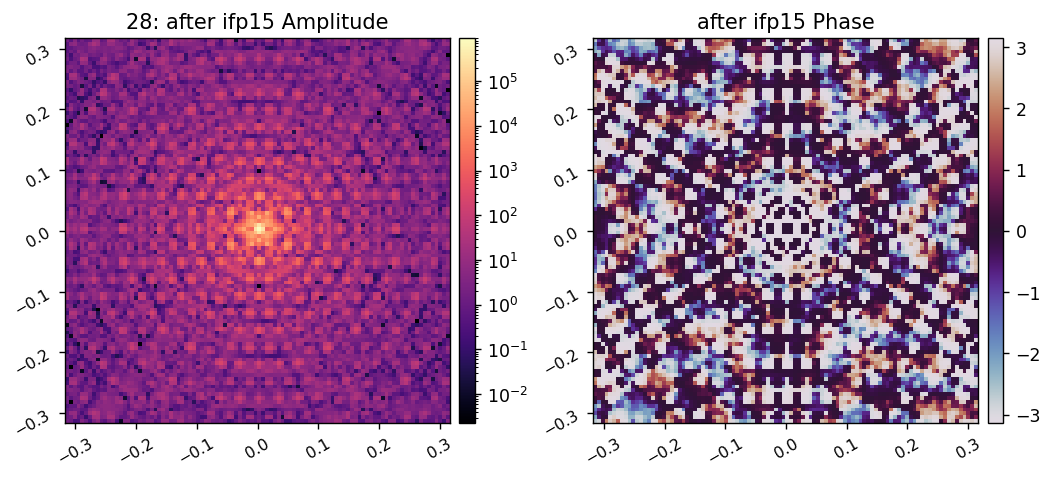

-1.1759446960822337
Pupil Diameter: 72.8862984526303 mm


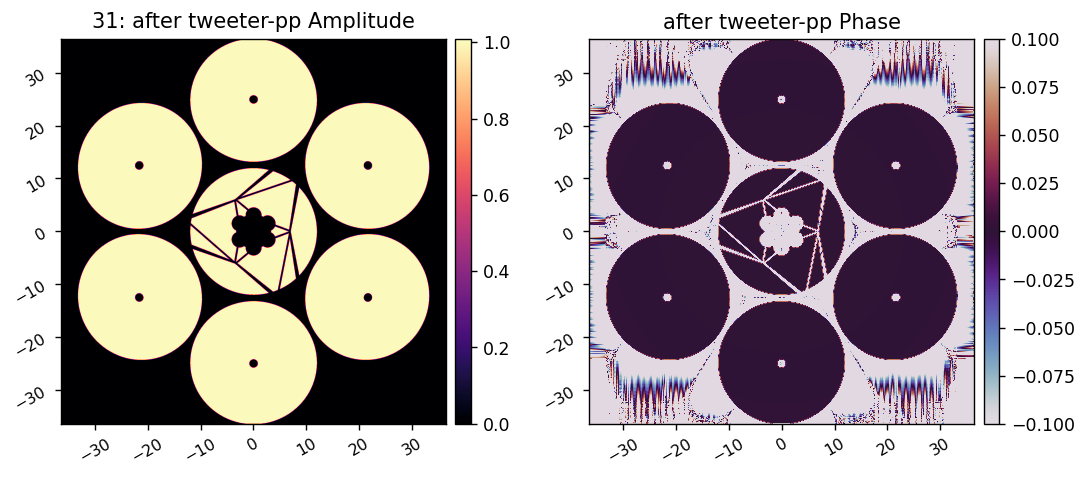

Correction distance: 0.00000164 mm


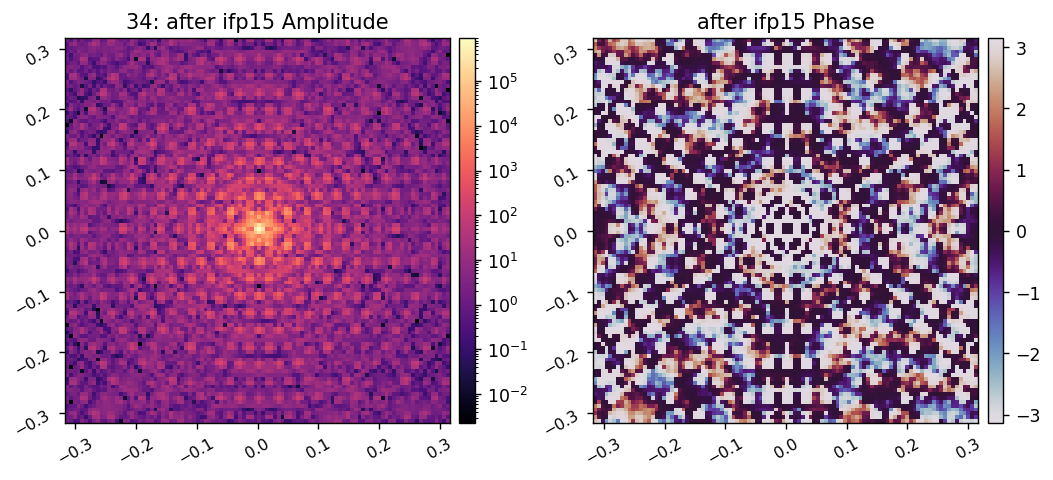

-1.125555076968638
Pupil Diameter: 11.975771643522481 mm


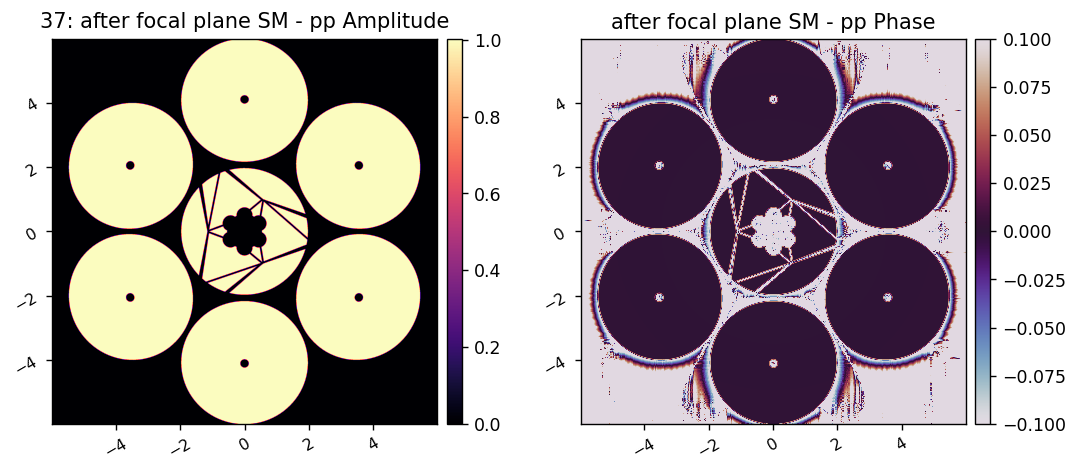

Correction distance: 0.00097557 mm


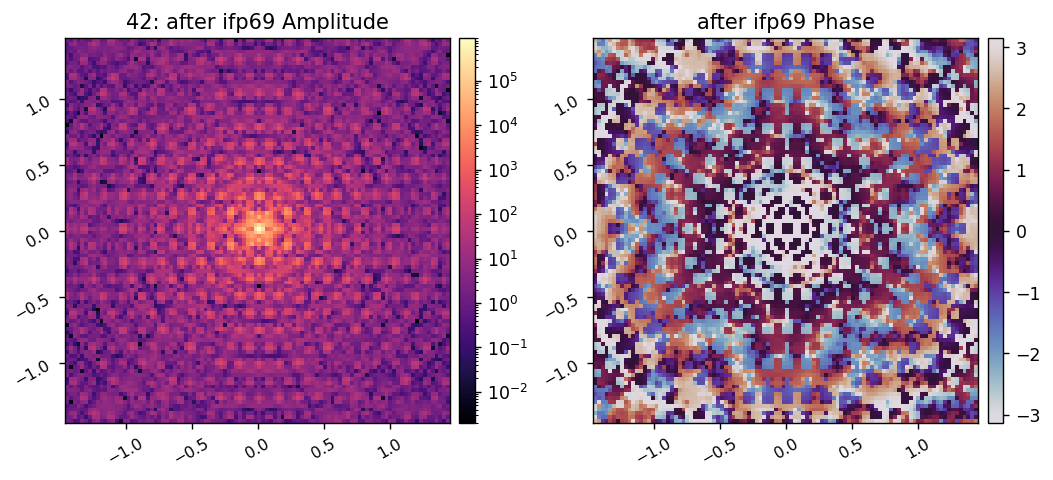

Pupil Diameter: 23.9511421127869 mm


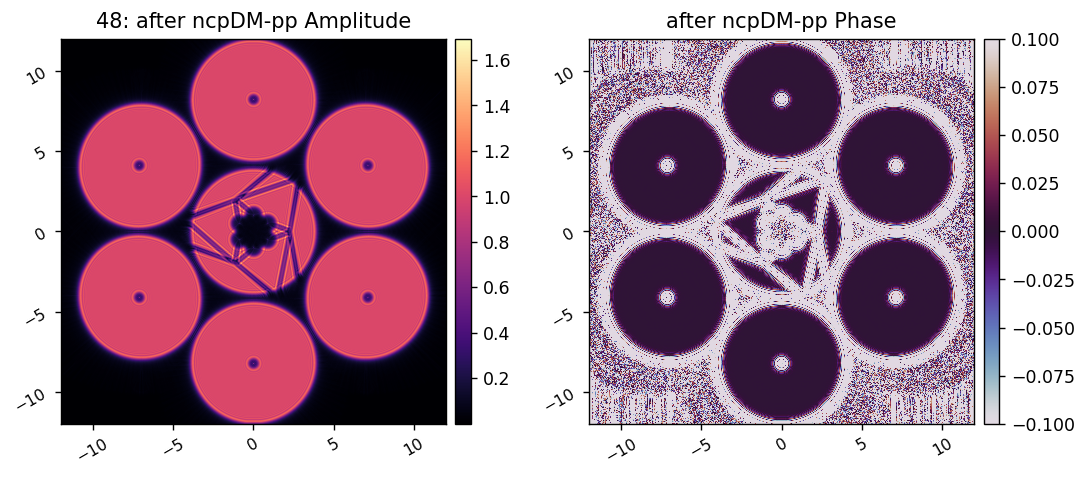

-1.0291563177705068
Pupil Diameter: 23.9511421127869 mm


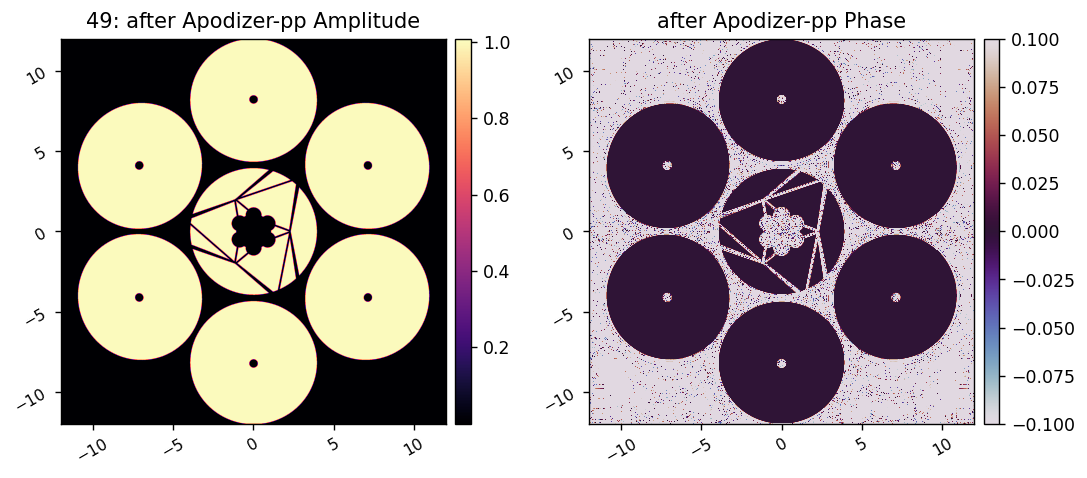

Correction distance: 0.00000000 mm


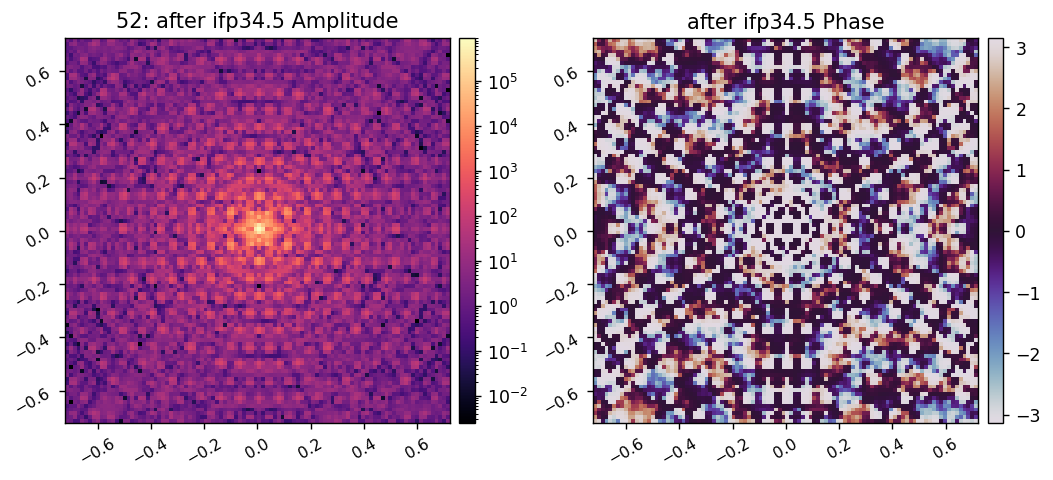

0.04234635910610069
Pupil Diameter: 25.20456869936683 mm


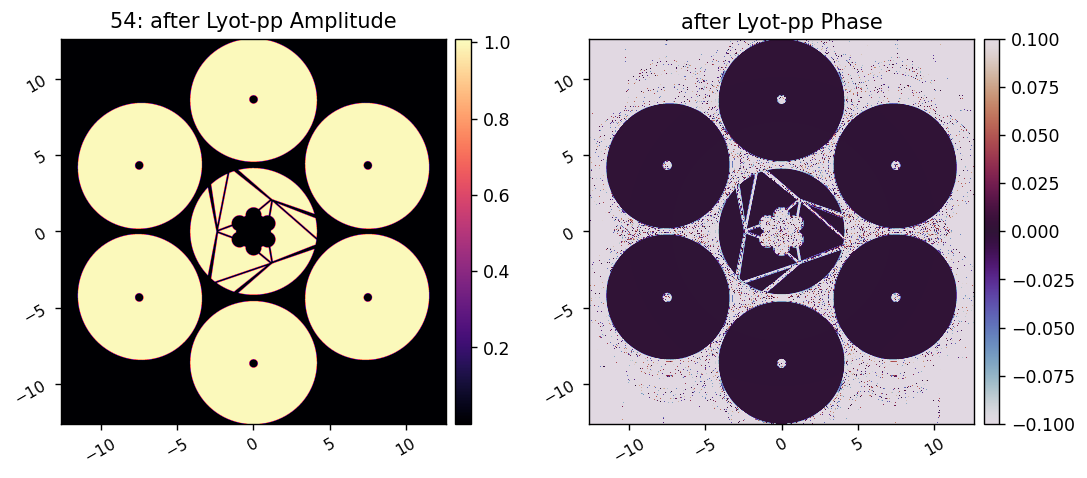

Correction distance: 0.00005643 mm


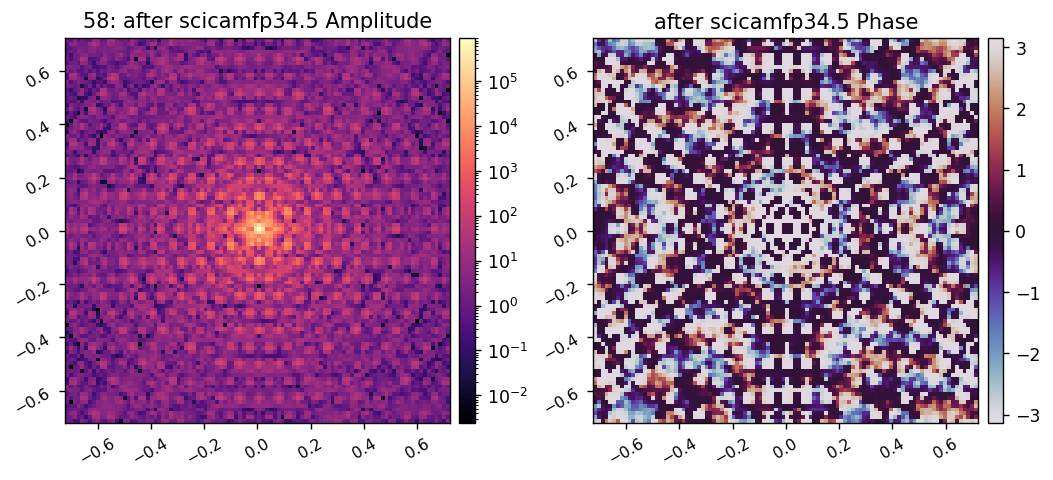

In [35]:
for i,wf in enumerate(wfs):
    if 'fp' in wf.location:
        print(f'Correction distance: {(wf.z_w0 - wf.z).to(u.mm):.8f}')
        npix = 100
        imshow2(wf.intensity, wf.phase, f'{i:d}: ' + wf.location + ' Amplitude', wf.location+' Phase',
                lognorm1=True,
                cmap2='twilight',
                npix=npix, pxscl=wf.pixelscale.to(u.mm/u.pix)
                )
    elif 'pp' in wf.location:
        diam = wf.pixelscale.to(u.mm/u.pix) * model.npix*u.pix
        if 'ncp' not in wf.location:
            print(100* (diam-zemax_pupil_diams[wf.location[6:]])/zemax_pupil_diams[wf.location[6:]])
        print(f'Pupil Diameter: {diam}')
        imshow2(wf.amplitude, wf.phase, f'{i:d}: ' + wf.location + ' Amplitude', wf.location+' Phase',
                cmap2='twilight',
                npix=model.npix, pxscl=wf.pixelscale.to(u.mm/u.pix),
                vmin2=-0.1, vmax2=0.1, 
                )
    # else:
    #     imshow2(wf.amplitude, wf.phase, f'{i:d}: ' + wf.location+' Amplitude', wf.location+' Phase',
    #             cmap2='twilight',
    #             npix=model.npix, pxscl=wf.pixelscale.to(u.mm/u.pix)
    #             )

# fsm_index = 7
# phs = utils.pad_or_crop(wfs[fsm_index].phase, model.npix)
# imshow1(phs*model.pupil_mask)

<Quantity 26.46534162 um>

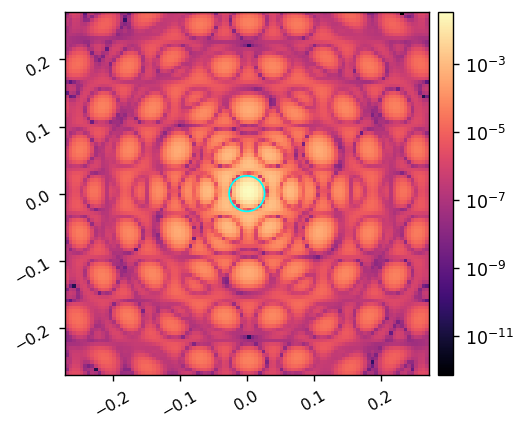

In [74]:
from matplotlib.patches import Circle
wf_index = -1
last_pupil_diam = 25.2*u.mm
um_per_lamD = (optics.focal_lengths['AOoap9-3'] * model.wavelength/(last_pupil_diam)).to(u.um)
display(1.22*um_per_lamD)
imshow1(wfs[wf_index].intensity, lognorm=True, pxscl=wfs[wf_index].pixelscale.to(u.mm/u.pix), npix=100,
        patches=[Circle((0,0), 1.22*um_per_lamD.to_value(u.mm), fill=False, color='cyan')])


In [230]:
reload(optics)
display(optics.focal_lengths['AOoap9-3'])
display(optics.distances['lyot-pp_fm16'] + optics.distances['fm16_AOoap9-3'])
display(optics.distances['AOoap9-3_fm17'] + optics.distances['fm17_scicamfp34.5'])

<Quantity 863.60372 mm>

<Quantity 863.60371439 mm>

<Quantity 863.6037168 mm>

In [170]:
863.60372 - 791.8854

71.71831999999995

In [86]:
reload(optics)
display(optics.focal_lengths['AOoap8'])
display(optics.distances['ifp69_pupilSM'] + optics.distances['pupilSM_fm12'] + optics.distances['fm12_AOoap8'])
display(optics.distances['AOoap8_fm13'] + optics.distances['fm13_fm14'] + optics.distances['fm14_ncpDM']+optics.distances['ncpDM_apodizer'])

<Quantity 1689.936177 mm>

<Quantity 1655.84809444 mm>

<Quantity 2361.77178794 mm>

In [231]:
reload(optics)
display(optics.focal_lengths['AOoap9-1'])
display(optics.distances['apodizer_AOoap9-1'])
display(optics.distances['AOoap9-1_fm15'] + optics.distances['fm15_ifp34.5'])

<Quantity 820.6511062 mm>

<Quantity 820.61101323 mm>

<Quantity 827.95989837 mm>

In [232]:
reload(optics)
display(optics.focal_lengths['AOoap9-2'])
display(optics.distances['ifp34.5_AOoap9-2'])
display(optics.distances['AOoap9-2_lyot-pp'])

<Quantity 863.5968 mm>

<Quantity 863.5968 mm>

<Quantity 863.5968 mm>

<Quantity 22.22596746 um>

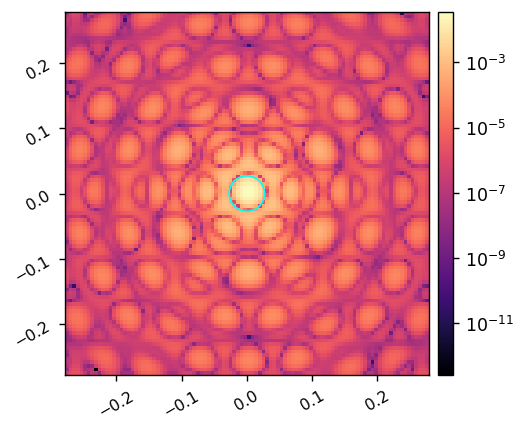

In [146]:
from matplotlib.patches import Circle
um_per_lamD = (optics.focal_lengths['AOoap9-1'] * model.wavelength/(24*u.mm)).to(u.um)
display(um_per_lamD)
imshow1(wfs[-3].intensity, lognorm=True, pxscl=wfs[-3].pixelscale.to(u.mm/u.pix), npix=100,
        patches=[Circle((0,0), 1.22*um_per_lamD.to_value(u.mm), fill=False, color='cyan')])

In [14]:
i = 4
(wfs[i].z_w0 - wfs[i].z).to(u.mm)

<Quantity 0.01052102 mm>

In [15]:
wfs[7].param_str

'w_0:1.760e-05 m, z_w0=4.591e+01 m\nz=4.660e+01 m, z_r=1.498e-12 m2 / nm'

In [16]:
i = 7
(wfs[i].z_w0 - wfs[i].z).to(u.mm)

<Quantity -688.130945 mm>

In [17]:
(wfs[-1].z_w0 - wfs[-1].z).to(u.mm)

<Quantity 91.42257718 mm>